# Lab 5: Regression

Welcome to Lab 5.

Today we will get some hands-on practice with linear regression. You can find more information about this topic in
[section 15.2](https://applieddatascience.cmp.uea.ac.uk/15/2/Regression_Line.html).

In [3]:
# Run this cell, but please don't change it.
from IPython.display import Image 
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# 1. How Faithful is Old Faithful? 

Old Faithful is a geyser in Yellowstone National Park that is famous for eruption on a fairly regular schedule. Run the cell below to see Old Faithful in action!

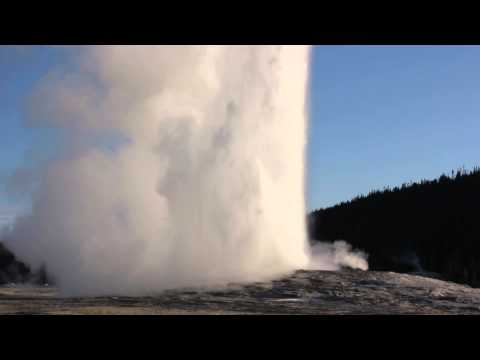

In [1]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  Whenever there is a long eruption, it is usually followed by an even longer wait before the next eruption. If you visit Yellowstone, you might want to predict when the next eruption will happen, so that you can see the rest of the park instead of waiting by the geyser.
 
Today, we will use a dataset on eruption durations and waiting times to see if we can make such predictions accurately with linear regression.

The dataset has one row for each observed eruption.  It includes the following columns:
- `duration`: Eruption duration, in minutes
- `wait`: Time between this eruption and the next, also in minutes

Run the next cell to load the dataset.

In [5]:
faithful = pd.read_csv("faithful.csv")
faithful

duration  wait
0       3.600  79.0
1       1.800  54.0
2       3.333  74.0
3       2.283  62.0
4       4.533  85.0
..        ...   ...
267     4.117  81.0
268     2.150  46.0
269     4.417  90.0
270     1.817  46.0
271     4.467  74.0

[272 rows x 2 columns]

We would like to use linear regression to make predictions, but that won't work well if the data aren't roughly linearly related.  To check that, we should look at the data.

**Question 1.1.** Make a scatter plot of the data.  It's conventional to put the column we want to predict on the vertical axis and the other column on the horizontal axis.

<!--
BEGIN QUESTION
name: q1_1
-->

Text(0, 0.5, 'wait')

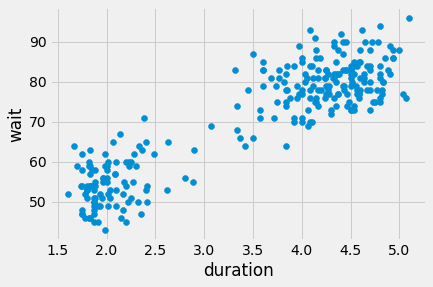

In [7]:
plt.scatter(faithful["duration"],faithful["wait"])
plt.xlabel("duration")
plt.ylabel("wait")

**Question 1.2.** Are eruption duration and waiting time roughly linearly related based on the scatter plot above? Is this relationship positive?

<!--
BEGIN QUESTION
name: q1_2
-->

*We can say that the duration and waiting time are roughly linearly related. There appears to be positive correlation between the two variable indicating that waiting time between eruptions increases with the duration of the previous eruption*

We're going to continue with the assumption that they are linearly related, so it's reasonable to use linear regression to analyze this data.

We'd next like to plot the data in standard units. If you don't remember the definition of standard units, textbook section [14.2](https://applieddatascience.cmp.uea.ac.uk/14/2/Variability.html#standard-units) might help!


**Question 1.3.** Compute the mean and standard deviation of the eruption durations and waiting times.  **Then** create a table called `faithful_standard` containing the eruption durations and waiting times in standard units.  The columns should be named `duration (standard units)` and `wait (standard units)`.

<!--
BEGIN QUESTION
name: q1_3
-->

In [14]:
duration_mean = faithful["duration"].mean()
duration_std = faithful["duration"].std()
wait_mean = faithful["wait"].mean()
wait_std = faithful["wait"].std()

# n.b. how do we convert to standard units?

faithful_standard = pd.DataFrame({
    "duration (standard units)": (faithful["duration"]-duration_mean) / duration_std,
    "wait (standard units)": (faithful["wait"]-wait_mean) / wait_std})

**Question 1.4.** Plot the data again, but this time in standard units.

<!--
BEGIN QUESTION
name: q1_4
-->

Text(0, 0.5, 'standardised wait')

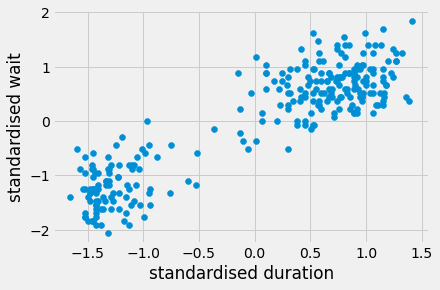

In [20]:
plt.scatter(faithful_standard["duration (standard units)"], faithful_standard["wait (standard units)"])
plt.xlabel("standardised duration")
plt.ylabel("standardised wait")

<img src="q1_4.png" alt="Drawing" style="width: 700px;" align='left'/>

You'll notice that this plot looks the same as the last one!  However, the data and axes are scaled differently.  So it's important to read the ticks on the axes.

**Question 1.5.** Among the following numbers, which would you guess is closest to the correlation between eruption duration and waiting time in this dataset?

1. -1
2. 0
3. 1

Assign `correlation` to the number corresponding to your guess.

<!--
BEGIN QUESTION
name: q1_5
-->

In [30]:
correlation = faithful_standard.corr()
correlation= correlation["duration (standard units)"]["wait (standard units)"]
correlation

0.900811168321813

**Question 1.6.** Compute the correlation `r`.  

*Hint:* Use `faithful_standard`.  Section [15.1](https://applieddatascience.cmp.uea.ac.uk/15/1/Correlation.html) explains how to do this.


In [31]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  
def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))
r = correlation(faithful,"duration","wait")
r

0.9008111683218134

## 2. The regression line
Recall that the correlation is the **slope of the regression line when the data are put in standard units**.

The next cell plots the regression line in standard units:

$$\text{waiting time in standard units} = r \times \text{eruption duration in standard units}.$$

Then, it plots the data in standard units again, for comparison.

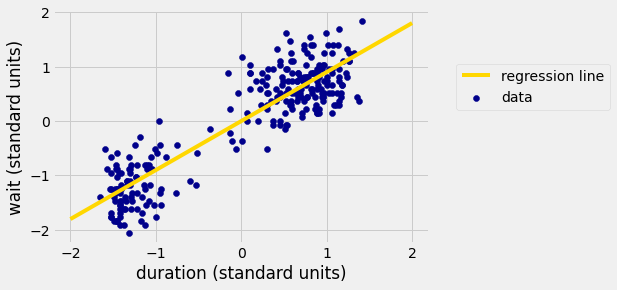

In [32]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points."""

    plt.scatter(dataset[x], dataset[y], label='data', c='darkblue')
    xs, ys = zip(point_0, point_1)
    plt.plot(xs, ys, label="regression line", c='gold')
    plt.legend(bbox_to_anchor=(1.5,.8))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show;

plot_data_and_line(faithful_standard, 
                   "duration (standard units)", 
                   "wait (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

How would you take a point in standard units and convert it back to original units?  We'd have to "stretch" its horizontal position by `duration_std` and its vertical position by `wait_std`. That means the same thing would happen to the slope of the line.

Stretching a line horizontally makes it less steep, so we divide the slope by the stretching factor.  Stretching a line vertically makes it more steep, so we multiply the slope by the stretching factor.

**Question 2.1.** Calculate the slope of the regression line in original units, and assign it to `slope`.

(If the "stretching" explanation is unintuitive, consult section [15.2](https://applieddatascience.cmp.uea.ac.uk/15/2/Regression_Line.html#the-equation-of-the-regression-line) in the textbook.)

In [34]:
slope = r * wait_std/duration_std
slope

10.729641395133532

We know that the regression line passes through the point `(duration_mean, wait_mean)`.  You might recall from high-school algebra that the equation for the line is therefore:

$$\text{waiting time} - \verb|wait_mean| = \texttt{slope} \times (\text{eruption duration} - \verb|duration_mean|)$$

The rearranged equation becomes:

$$\text{waiting time} = \texttt{slope} \times \text{eruption duration} + (- \texttt{slope} \times \verb|duration_mean| + \verb|wait_mean|)$$


**Question 2.2.** Calculate the intercept in original units and assign it to `intercept`.

<!--
BEGIN QUESTION
name: q2_2
-->

In [35]:
intercept = wait_mean-slope*duration_mean
intercept

33.47439702275333

## 3. Investigating the regression line
The slope and intercept tell you exactly what the regression line looks like.  To predict the waiting time for an eruption, multiply the eruption's duration by `slope` and then add `intercept`.

**Question 3.1.** Compute the predicted waiting time for an eruption that lasts 2 minutes, and for an eruption that lasts 5 minutes.

<!--
BEGIN QUESTION
name: q3_1
-->

In [37]:
two_minute_predicted_waiting_time = intercept + 2*slope
five_minute_predicted_waiting_time = intercept + 5*slope

# Here is a helper function to print out your predictions.
# Don't modify the code below.
def print_prediction(duration, predicted_waiting_time):
    print("After an eruption lasting", duration,
          "minutes, we predict you'll wait", predicted_waiting_time,
          "minutes until the next eruption.")

print_prediction(2, two_minute_predicted_waiting_time)
print_prediction(5, five_minute_predicted_waiting_time)

After an eruption lasting 2 minutes, we predict you'll wait 54.93367981302039 minutes until the next eruption.
After an eruption lasting 5 minutes, we predict you'll wait 87.122603998421 minutes until the next eruption.


The next cell plots the line that goes between those two points, which is (a segment of) the regression line.

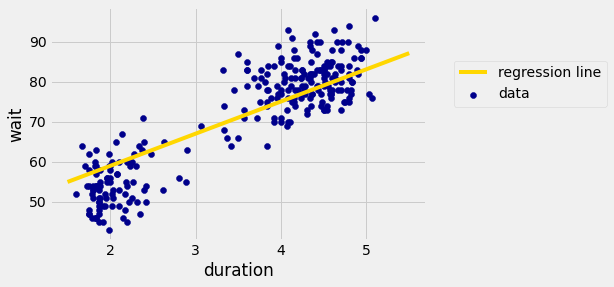

In [39]:
plot_data_and_line(faithful, "duration", "wait", 
                   [1.5, two_minute_predicted_waiting_time], 
                   [5.5, five_minute_predicted_waiting_time])

**Question 3.2.** Make predictions for the waiting time after each eruption in the `faithful` table.  (Of course, we know exactly what the waiting times were!  We are doing this so we can see how accurate our predictions are.)  Put these numbers into a column in a new table called `faithful_predictions`.  Its first row should look like this:

|duration|wait|predicted wait|
|-|-|-|
|3.6|79|72.1011|

*Hint:* Your answer can be just one line.  There is no need for a `for` loop; use array arithmetic instead.

<!--
BEGIN QUESTION
name: q3_2
-->

In [73]:
faithful_predictions = faithful.copy()
faithful_predictions["predicted wait"] = faithful[["duration"]]*slope + intercept
faithful_predictions

duration  wait  predicted wait
0       3.600  79.0       72.101106
1       1.800  54.0       52.787752
2       3.333  74.0       69.236292
3       2.283  62.0       57.970168
4       4.533  85.0       82.111861
..        ...   ...             ...
267     4.117  81.0       77.648331
268     2.150  46.0       56.543126
269     4.417  90.0       80.867223
270     1.817  46.0       52.970155
271     4.467  74.0       81.403705

[272 rows x 3 columns]

**Question 3.3.** How close were we?  Compute the *residual* for each eruption in the dataset.  The residual is the actual waiting time minus the predicted waiting time.  Add the residuals to `faithful_predictions` as a new column called `residual` and name the resulting table `faithful_residuals`.

*Hint:* Again, your code will be much simpler if you don't use a `for` loop.

<!--
BEGIN QUESTION
name: q3_3
-->

In [75]:
faithful_residuals = faithful_predictions["wait"] - faithful_predictions["predicted wait"]
faithful_predictions["residual"] = faithful_residuals
faithful_predictions

duration  wait  predicted wait   residual
0       3.600  79.0       72.101106   6.898894
1       1.800  54.0       52.787752   1.212248
2       3.333  74.0       69.236292   4.763708
3       2.283  62.0       57.970168   4.029832
4       4.533  85.0       82.111861   2.888139
..        ...   ...             ...        ...
267     4.117  81.0       77.648331   3.351669
268     2.150  46.0       56.543126 -10.543126
269     4.417  90.0       80.867223   9.132777
270     1.817  46.0       52.970155  -6.970155
271     4.467  74.0       81.403705  -7.403705

[272 rows x 4 columns]

Here is a plot of the residuals you computed.  Each point corresponds to one eruption.  It shows how much our prediction over- or under-estimated the waiting time.

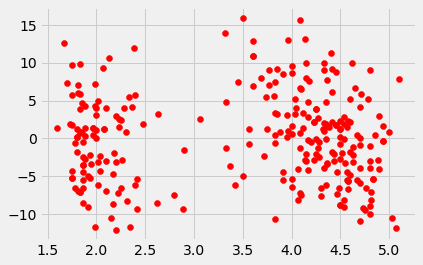

In [77]:
plt.scatter(faithful_predictions['duration'], faithful_predictions['residual'], c='red');

There isn't really a pattern in the residuals, which confirms that it was reasonable to try linear regression.  It's true that there are two separate clouds; the eruption durations seemed to fall into two distinct clusters.  But that's just a pattern in the eruption durations, not a pattern in the relationship between eruption durations and waiting times.